First we import the necessary libraries and data we'll be using.

In [63]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

apartment_data = pd.read_csv("apartment_data.csv")

Now we rearrange the data as needed and delete unneccessary rows.

In [64]:
# Remove the rows with missing values
apartment_data = apartment_data.dropna()

# set a solid location
apartment_data.loc[:, "location"] = (
    apartment_data.loc[:, ("location")].str.split(",").str[-1].str.strip()
)

# split external features into new fields
external_features = apartment_data["external_features"].str.split(",")

for feature in external_features.explode().unique():
    apartment_data.loc[:, (f"external_has_{feature.strip()}")] = apartment_data.loc[
        :, ("external_features")
    ].apply(lambda x: 1 if feature.strip() in x else 0)

# split internal features into new fields
internal_features = apartment_data["internal_features"].str.split(",")

for feature in internal_features.explode().unique():
    apartment_data.loc[:, (f"internal_has_{feature.strip()}")] = apartment_data.loc[
        :, ("internal_features")
    ].apply(lambda x: 1 if feature.strip() in x else 0)

# split internal features into new fields
nearby_features = apartment_data["nearby"].str.split(",")

for feature in nearby_features.explode().unique():
    apartment_data.loc[:, (f"nearby_{feature.strip()}")] = apartment_data.loc[
        :, ("nearby")
    ].apply(lambda x: 1 if feature.strip() in x else 0)

# convert location values into numerical values
location_labels, loaction_uniques = pd.factorize(apartment_data["location"])
apartment_data.loc[:, "location_encoded"] = location_labels

# remove unnecessary columns
apartment_data.drop(
    ["external_features", "internal_features", "nearby", "title"], axis=1, inplace=True
)

apartment_data.head()

,bathrooms,bedrooms,location,price,external_has_Balcony,external_has_Gym,external_has_Lift/Elevator,external_has_Parking,external_has_CCTV,external_has_Swimming Pool,...,internal_has_Aircon,internal_has_Serviced,nearby_Bus Stop,nearby_Shopping Centre,nearby_Hospital,nearby_School,nearby_Golf Course,nearby_Scenic View,nearby_Sea View,location_encoded
0,2,2,Westlands,250000,1,1,1,1,1,1,...,0,0,1,1,1,1,0,0,0,0
1,3,3,Lavington,200000,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
2,3,2,Westlands,95000,1,1,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0
4,1,1,Westlands,300000,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
5,2,2,Westlands,160000,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,0


<Axes: >

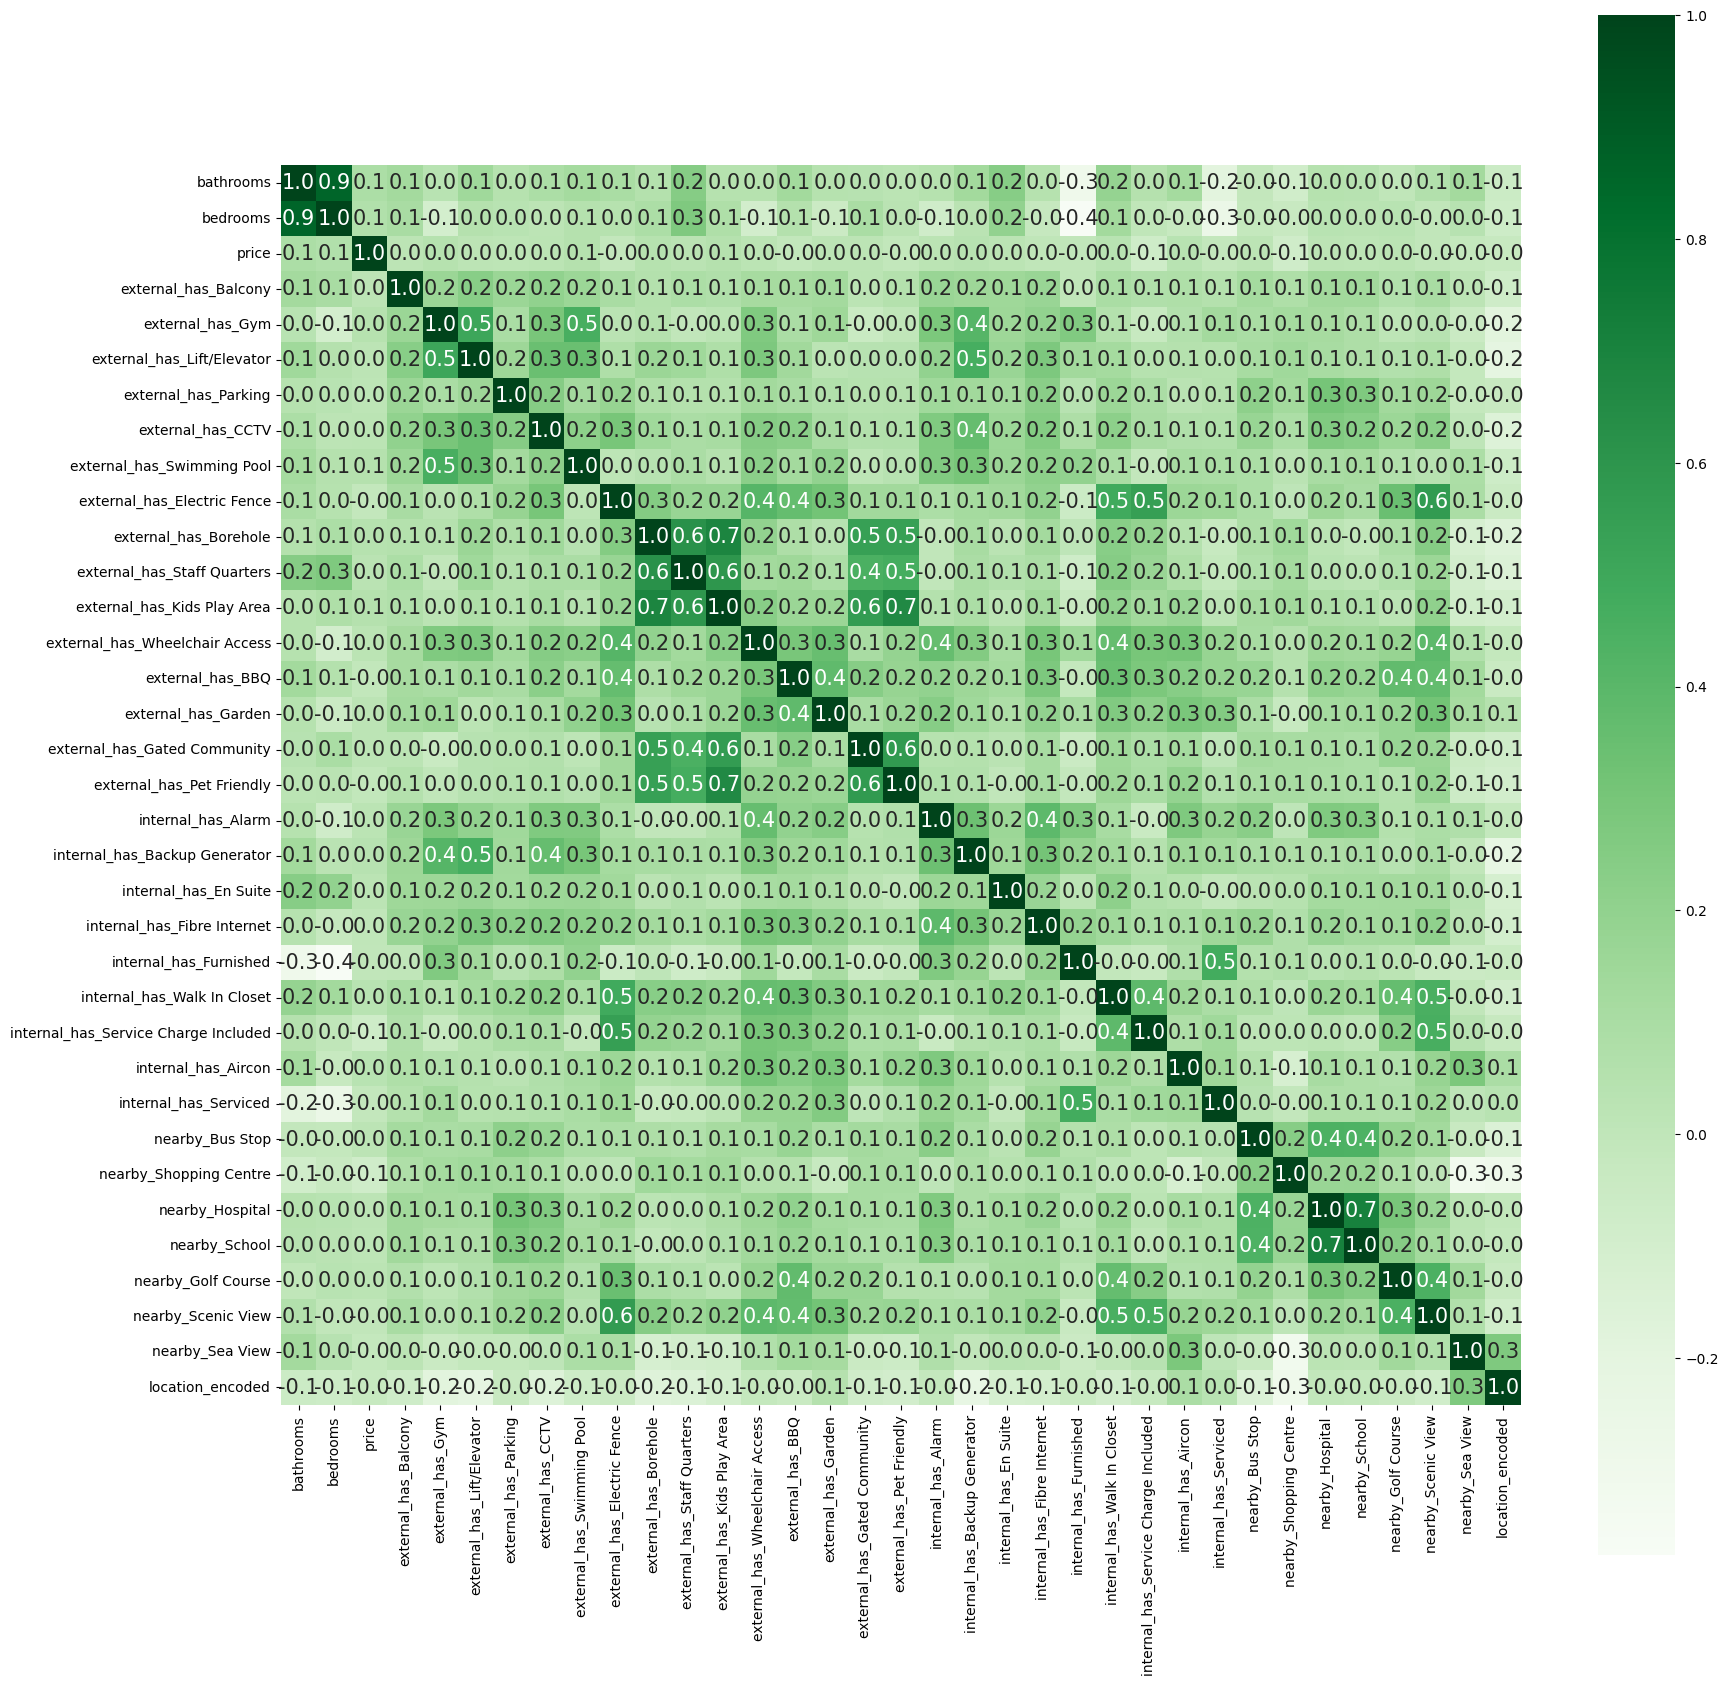

In [65]:
# Find the correlation between the features
apartment_data_without_location = apartment_data.drop(["location"], axis=1)
corr = apartment_data_without_location.corr()
corr.shape

# Plot the correlation between features
plt.figure(figsize=(20, 20))
sns.heatmap(
    corr,
    cbar=True,
    square=True,
    fmt=".1f",
    annot=True,
    annot_kws={"size": 15},
    cmap="Greens",
)

Let's setup the target variable and features.

In [66]:
# the target variable
y = apartment_data.price

# the features
external_features = [x for x in apartment_data.columns if "external_has_" in x]
internal_features = [x for x in apartment_data.columns if "internal_has_" in x]
nearby_features = [x for x in apartment_data.columns if "nearby_" in x]

apartment_features = [
    "bedrooms",
    "bathrooms",
    "location_encoded",
]
apartment_features.extend(external_features)
apartment_features.extend(internal_features)
apartment_features.extend(nearby_features)

X = apartment_data[apartment_features]

Let's prepare the model by creating a testing and training set.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (1530, 34)
Size of test set: (656, 34)


Now we create a model and train it. We a re going to choose one that fits this data well.

Let's start with `Logistic Regression`.

In [68]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/home/nyagah/.cache/pypoetry/virtualenvs/apartment-price-predictor-O259uquc-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
# prediction on test data
y_pred = logistic_regression.predict(X_test)
y_pred

array([130000, 250000, 140000, 160000, 170000, 140000, 250000,  75000,
       180000, 250000, 120000, 165000, 360000, 280000, 350000, 350000,
       350000,  75000, 280000,  80000, 200000, 250000, 140000, 180000,
       140000, 160000, 250000, 100000,  75000, 250000, 320000, 250000,
       200000, 350000,  80000, 180000, 260000,  90000,  80000, 100000,
       350000, 250000, 160000, 250000, 150000, 350000, 180000, 200000,
       130000, 200000, 140000, 170000, 150000, 220000, 180000, 200000,
       140000, 180000, 220000, 180000, 250000, 260000, 250000, 160000,
       200000, 140000, 140000, 140000,  65000, 250000, 180000, 200000,
       170000, 170000,  90000, 160000, 170000, 150000, 170000, 150000,
       160000, 140000, 160000, 360000, 170000, 260000,  70000, 350000,
       160000, 150000,  85000, 150000, 200000, 200000, 100000, 350000,
       150000, 200000, 180000, 250000, 250000,  60000, 250000, 350000,
       150000, 150000, 250000, 250000, 280000, 150000, 300000, 160000,
      

In [70]:
# Calculate the accuracy of the model
accuracy_logistic_regression = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy of Logistic Regression model: {accuracy_logistic_regression}%")

Accuracy of Logistic Regression model: 12.04%
